# Отток клиентов

## 1. Введение
      
###     ЦЕЛЬ ПРОЕКТА: Проанализировать данные о клиентах «Бета-Банка» и построить ML-модель со значением метрики F1-мера не менее 0.59

###    ДАННЫЕ: 
    
  - Признаки: 
      
    - RowNumber — индекс строки в данных;
    - CustomerId — уникальный идентификатор клиента;
    - Surname — фамилия;
    - CreditScore — кредитный рейтинг;
    - Geography — страна проживания;
    - Gender — пол;
    - Age — возраст;
    - Tenure — сколько лет человек является клиентом банка;
    - Balance — баланс на счёте;
    - NumOfProducts — количество продуктов банка, используемых клиентом;
    - HasCrCard — наличие кредитной карты;
    - IsActiveMember — активность клиента;
    - EstimatedSalary — предполагаемая зарплата.
        
        
  - Целевой признак:
  
    - Exited — факт ухода клиента.
  
### ПЛАН ВЫПОЛНЕНИЯ ПРОЕКТА:

  - Загрузить и подготовить данные;
  - Исследовать баланс классов и обучить модель без учета дисбаланса;
  - Улучшить качество модели, учитывая дисбаланс классов;
  - Обучить разные модели и найти лучшую;
  - Провести финальное тестирование;
  - Сформулировать и оформить промежуточный и общий выводы.


  
  ## 2. Открытие, изучение и подготовка данных

In [1]:
#загружаем библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

import xgboost

import numpy as np

import matplotlib.pyplot as plt

#настраиваем оторбражение 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

#читаем данные 
data = pd.read_csv('../Downloads/Churn.csv', sep=',')

In [2]:
#смотрим общее инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
#выводим первые и последние строки
display(data.head())
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [4]:
#изучаем столбец с пропусками
print(data['Tenure'].isna().sum())
data['Tenure'].value_counts()  

909


1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [5]:
#изучаем пропуски
display(data[data['Tenure'].isna()].head(10))
data[data['Tenure'].isna()].tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9914,9915,15568876,Hughes,496,France,Female,34,NaN,102723.35,2,1,0,180844.81,0
9923,9924,15786789,Ni,725,France,Female,29,NaN,0.00,2,1,1,190776.83,0
9925,9926,15605672,Yuan,694,France,Female,38,NaN,195926.39,1,1,1,85522.84,0
9931,9932,15647800,Greco,850,France,Female,34,NaN,101266.51,1,1,0,33501.98,0
9938,9939,15593496,Korovin,526,Spain,Female,36,NaN,91132.18,1,0,0,58111.71,0
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
#ищем дубликаты
data.duplicated().sum()

0

In [7]:
#выводим список уникальных значнеий по частоте встреачемости
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
#выводим список уникальных значнеий по частоте встреачемости
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

850    233
678     63
655     54
667     53
705     53
Name: CreditScore, dtype: int64

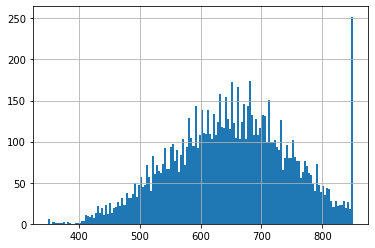

In [9]:
#строим гистограмму
data['CreditScore'].hist(bins=150);
#выводим список уникальных значнеий по частоте встреачемости
data['CreditScore'].value_counts().head(5)

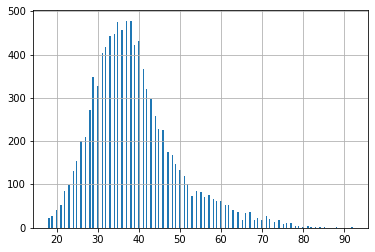

In [10]:
#строим гистограмму
data['Age'].hist(bins=200);

In [11]:
#выводим список уникальных значнеий по частоте встреачемости
data['Tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
Name: Balance, dtype: int64

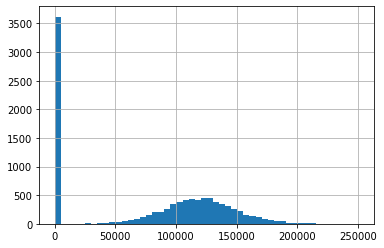

In [12]:
#строим гистограмму
data['Balance'].hist(bins=50);
#выводим первые 5 строк списка уникальных значнеий по частоте встреачемости
data['Balance'].value_counts().head()

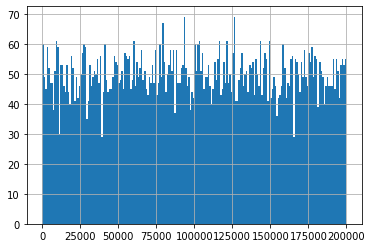

In [13]:
#строим гистограмму
data['EstimatedSalary'].hist(bins=200);

In [14]:
#выводим список уникальных значнеий по частоте встреачемости
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [15]:
#выводим список уникальных значнеий по частоте встреачемости
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
#выводим список уникальных значнеий по частоте встреачемости
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
#выводим список уникальных значнеий по частоте встреачемости
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
#избавляемся от лишних столбцов
data_drop = data.drop(['RowNumber','CustomerId','Surname'], axis= 1)
#проверяем
data_drop.info()
display(data_drop.head())
data_drop.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [19]:
#проводим кодирование категориальных признаков с удалением первого столбца, чтобы не попасть в dummi-ловушку
data_ohe = pd.get_dummies(data_drop, drop_first=True)

#проверяем
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
#проверяем преобразованные данные на корреляцию, чтобы выявить мультиколлинеарность признаков 
data_ohe.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761,-0.003299,0.000810,0.012634
Balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.003299,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [21]:
#оставим в данных один георграфический признак - тот, который больше коррелирует с целевым признаком   
data_ohe.drop('Geography_Spain', axis=1, inplace=True)

#проверяем
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0


In [22]:
#формируем выборки и выделяем цель и признаки: 

#выделяем цель и признаки
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

#формируем три выборки: обучающую(75%), валидационную(12,5%) и тестовую(12,5%)
features_train, features_test1, target_train, target_test1 = train_test_split(features,
                                target,
                                test_size=0.25,
                                random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_test1,
                                target_test1,
                                test_size=0.5,
                                random_state=12345)

In [23]:
#избавляемся от выбросов:

#создаем список количественных признаков 
numeric = ['CreditScore','Balance']

#масштабируем данные
scaler = RobustScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#проверяем размер итоговых выборок
print(features_train.shape) 
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape) 
print(target_valid.shape)
print(target_test.shape)

(7500, 10)
(1250, 10)
(1250, 10)
(7500,)
(1250,)
(1250,)


In [24]:
#проводим масштабирование количественных признаков

#создаем список количественных признаков 
numeric = ['CreditScore', 'Age', 
          'Tenure','Balance',
           'NumOfProducts','EstimatedSalary']

#масштабируем количественные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#проверяем размер итоговых выборок
print(features_train.shape) 
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape) 
print(target_valid.shape)
print(target_test.shape)

(7500, 10)
(1250, 10)
(1250, 10)
(7500,)
(1250,)
(1250,)


In [25]:
#меняем пропуски так, чтобы избежать утечки данных:

#проверяем до
print(features_train['Tenure'].isna().sum())
print(features_train['Tenure'].value_counts())
print()

#меняем пропуски на медиану группы по возрасту  
name = 'Tenure'
features_train[name] = np.where(features_train[name].isna(),
                     features_train['Age'].map(features_train.groupby('Age')[name].median()), 
                      features_train[name])

#проверяем после
print(features_train['Tenure'].isna().sum())
features_train['Tenure'].value_counts()

700
 1.030069    719
-1.392784    711
-0.008297    708
 0.683947    691
-0.700541    687
-1.046662    682
 0.337825    668
 1.376191    662
-0.354419    658
 1.722313    330
-1.738906    284
Name: Tenure, dtype: int64

0


-0.008297    1348
 1.030069     719
-1.392784     711
-0.700541     692
 0.337825     692
 0.683947     691
-1.046662     682
-0.354419     675
 1.376191     662
 1.722313     330
-1.738906     284
 0.510886      11
-0.008297       2
-0.181358       1
Name: Tenure, dtype: int64

In [26]:
#проверяем до
print(features_valid['Tenure'].isna().sum())
print(features_valid['Tenure'].value_counts())
print()

#меняем пропуски на медиану группы по возрасту 
name = 'Tenure'
features_valid[name] = np.where(features_valid[name].isna(),
                     features_valid['Age'].map(features_train.groupby('Age')[name].median()), 
                      features_valid[name])
#проверяем после
print(features_valid['Tenure'].isna().sum())
features_valid['Tenure'].value_counts()

109
-0.700541    131
 0.683947    129
-1.046662    126
-0.354419    112
 1.376191    111
 1.030069    108
 0.337825    107
-0.008297    105
-1.392784    103
 1.722313     61
-1.738906     48
Name: Tenure, dtype: int64

0


-0.008297    200
-0.700541    132
 0.683947    129
-1.046662    126
-0.354419    117
 1.376191    111
 0.337825    110
 1.030069    108
-1.392784    104
 1.722313     61
-1.738906     48
 0.510886      2
 0.164764      1
-0.181358      1
Name: Tenure, dtype: int64

In [27]:
#проверяем до
print(features_test['Tenure'].isna().sum())
print(features_test['Tenure'].value_counts())
print()

#меняем пропуски на медиану группы по возрасту 
name = 'Tenure'
features_test[name] = np.where(features_test[name].isna(),
                     features_test['Age'].map(features_train.groupby('Age')[name].median()), 
                      features_test[name])
#проверяем после
print(features_test['Tenure'].isna().sum())
features_test['Tenure'].value_counts()

100
-1.046662    142
-1.392784    138
-0.354419    115
-0.008297    114
-0.700541    110
 1.376191    109
 1.030069    106
 0.337825    106
 0.683947    105
 1.722313     55
-1.738906     50
Name: Tenure, dtype: int64

0


-0.008297    205
-1.046662    142
-1.392784    138
-0.354419    118
-0.700541    110
 1.376191    109
 0.337825    109
 1.030069    106
 0.683947    105
 1.722313     55
-1.738906     50
 0.510886      3
Name: Tenure, dtype: int64

In [28]:
#проверяем размер выборок после замены пропусков
print(features_train.shape) 
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape) 
print(target_valid.shape)
print(target_test.shape)

(7500, 10)
(1250, 10)
(1250, 10)
(7500,)
(1250,)
(1250,)


### 2.1. Загрузка изучение и обработка данных

  - **загрузили и изучили данные**.
  
  - **выполнили предобработку** и **разбили** датасет на **выборки**: 
  
     - удалили столбцы с избыточными данными: 'RowNumber', 'CustomerId' - не несут полезной нагрузки,  'Surname' - содержит несущественный для данной задачи индивидуальный признак, который непредсказуем в новых данных;
  
     - провели кодирование категориальных признаков методом 'get_dummies' с удалением первого столбца, чтобы не попасть в dummi-ловушку; 
     
     - оставили в данных один 'георграфический признак' - тот, который больше коррелирует с целевым признаком, чтобы избежать мультиколлинеарности признаков;
     
     - разбили датасет на три выборки: тренировочную - 70% данных, валидационную - 15% и тестовую - 15%;
     
     - выделили из каждой выборки датафрейм с признаками и колонку с целевым признаком;
         
     - избавились от выбросов в столбцах 'CreditScore' и 'Balance' методом 'RobustScaler';
     
     - провели масштабирование количественных признаков в столбцах 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' методом 'StandardScaler';
  
     - обработали пропуски в столбце "Tenure" медианами по категориям столбца "Age" так, чтобы избежать утечки данных: после кодирования категориальных признаков, масштабирования количественных признаков и разделения датасета на выборки, группируя данные и рассчитывая медиану только в обучающей выборке.

 ## 3. Исследование баланса классов и обучение модели без учёта дисбаланса

In [29]:
#обучаем модель на логистической регресси без учета баланса классов 
#вычисляем AUC-ROC, Accuracy, F1-меру
#и строим матрицу ошибок

#активируем модель
model = LogisticRegression(random_state=12345, 
                           solver='liblinear',
                          ) 
#обучаем модель на тренировочной выборке
model.fit(features_train, target_train) 

#получаем предсказание модели на валидационной выборке 
predicted_valid = model.predict(features_valid) 

#вычисляем accuracy
accuracy_imbalanced = accuracy_score(target_valid, predicted_valid)
print("Accuracy:", accuracy_imbalanced )

#вычисляем f1-меру 
f1_score_imbalanced = f1_score(target_valid, predicted_valid)
print("F1:",f1_score_imbalanced)

#вычисляем AUC-ROC:
#вычисляем вероятность положительных классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#считаем  AUC-ROC
roc_auc_score_imbalanced = roc_auc_score(target_valid, probabilities_one_valid) 
print('AUC-ROC:',roc_auc_score_imbalanced)

#и строим матрицу ошибок
confusion_matrix_imbalanced = confusion_matrix(target_valid, predicted_valid)
print('Матрица ошибок')
print(confusion_matrix_imbalanced)

Accuracy: 0.7944
F1: 0.28808864265927975
AUC-ROC: 0.7506465776494646
Матрица ошибок
[[941  37]
 [220  52]]


In [30]:
#считаем точность и полноту
print('Точность:', precision_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))

Точность: 0.5842696629213483
Полнота: 0.19117647058823528


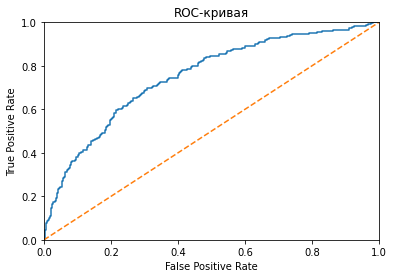

In [31]:
#строим ROC-кривую,чтобы оценить, насколько обученная модель отличается от случайной

#перебираем fpr, tpr с разными порогами классификации 
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

#строим график для fpr, tpr
plt.figure()
plt.plot(fpr, tpr)

#строим ROC-кривую случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

#устанавливаем границы осей от 0 до 1
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#подписываем оси 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#добавляем заголовок
plt.title("ROC-кривая")

#выводим готовый график
plt.show()

0    0.7963
1    0.2037
Name: Exited, dtype: float64

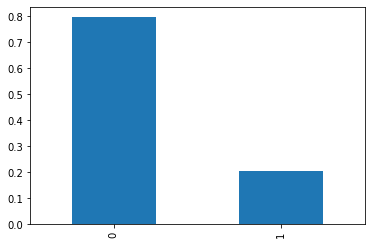

In [32]:
#выводим соотношение 0 и 1 в цели (дисбаланс классов)
(target.value_counts(normalize=True).plot(kind='bar'));
target.value_counts(normalize=True)

0    0.9288
1    0.0712
dtype: float64

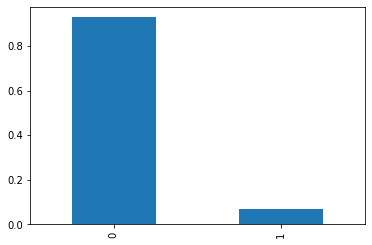

In [33]:
#проверяем дисбаланс классов в предсказаниях модели:

#создаем Series с предсказаниями модели
predicted_valid = pd.Series(model.predict(features_valid))

#строим график и выводим соотношение 0 и 1 (дисбаланс классов)
(predicted_valid.value_counts(normalize=True).plot(kind='bar'));
predicted_valid.value_counts(normalize=True)

 - Проверим адекватность модели на константной модели, которая любому объекту прогнозирует класс «0»

In [34]:
#проверяем адекватность модели на константной модели:

#создаем Series с нулевыми ответами
target_pred_constant = pd.Series([0]*len(target))

#вычисляем accuracy
accuracy_imbalanced = accuracy_score(target, target_pred_constant)
print("Accuracy константной модели:", accuracy_imbalanced )

Accuracy константной модели: 0.7963


### 3.1. Исследование баланса классов и обучение модели без учёта дисбаланса

 -  Провели **пробное обучение** модели 'Логистической регрессии' **без учета баланса** классов, вычислили 'AUC-ROC', 'Accuracy', 'F1-меру', построили 'Матрицу ошибок' и посчитали 'Точность' и 'Полноту':
 
    - Модель показала высокое значение **'Accuracy' (0.7944)**, низкое **'F1-меры' (0.28808864265927975)**, удовлетворительное - **'AUC-ROC' (0.7506465776494646)**, среднюю **'Точность'(0.5842696629213483)** и очень низкую **'Полноту'(0.19117647058823528)**. **Модель** хорошо **предсказывает отрицательные классы**, но очень часто **ошибается в предсказании положительных**. Модель справляется **лучше случайной** модели, судя по ROC-кривой, но **хуже константной**.    
   
 
 -  Исследовали **баланс классов**:
 
    -  Исследование показало д**исбаланс** класов **в сторону отрицательных (4/1)**, что отражается **на предсказаниях** модели, где дисбаланс еще выше **(13/1)**. 
 
 
 
 - Проверили **адекватность** модели **на константной модели**, которая любому объекту прогнозирует класс «0»:
  
    - Модель продемонстрировала значение **'Accuracy' 0.7963** - выше, чем у пробной модели, что подтверждает **сильный дисбаланс классов**.

  ## 4. Обучение модели с учётом дисбаланса

In [35]:
#активируем и обучаем модель с учетом баланса классов 
model = LogisticRegression(random_state=12345, 
                           solver='liblinear',
                           class_weight='balanced'
                          )
model.fit(features_train, target_train)

#получаем предсказание модели на валидационной выборке
predicted_valid = model.predict(features_valid)

#вычисляем accuracy
accuracy_balanced = accuracy_score(target_valid, predicted_valid)
print("Accuracy:", accuracy_balanced )

#вычисляем f1-меру 
f1_score_balanced = f1_score(target_valid, predicted_valid)
print("F1:",f1_score_balanced)

#вычисляем AUC-ROC:
#вычисляем вероятность положительных классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#считаем  AUC-ROC
roc_auc_score_balanced = roc_auc_score(target_valid, probabilities_one_valid) 
print('AUC-ROC:',roc_auc_score_balanced)

#и строим матрицу ошибок
confusion_matrix_balanced = confusion_matrix(target_valid, predicted_valid)
print('Матрица ошибок')
print(confusion_matrix_balanced)

Accuracy: 0.7064
F1: 0.49931787175989084
AUC-ROC: 0.7564018705641766
Матрица ошибок
[[700 278]
 [ 89 183]]


In [36]:
#считаем точность и полноту
print('Точность:', precision_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))

Точность: 0.3969631236442516
Полнота: 0.6727941176470589


In [37]:
#сбалансируем классы, увеличив количество объектов со значением 1
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#активируем и обучаем модель на новой выборке
model = LogisticRegression(random_state=12345, 
                           solver='liblinear'
                          )
model.fit(features_upsampled, target_upsampled)

#получаем предсказание модели на валидационной выборке
predicted_valid = model.predict(features_valid)

#вычисляем accuracy
accuracy_score_upsampled = accuracy_score(target_valid, predicted_valid)
print("Accuracy:", accuracy_score_upsampled)

#вычисляем f1-меру 
f1_score_upsampled = f1_score(target_valid, predicted_valid)
print("F1:",f1_score_upsampled)

#вычисляем AUC-ROC:
#вычисляем вероятность положительных классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#считаем  AUC-ROC
roc_auc_score_upsampled = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',roc_auc_score_upsampled)

#и строим матрицу ошибок
confusion_matrix_upsampled = confusion_matrix(target_valid, predicted_valid)
print('Матрица ошибок')
print(confusion_matrix_upsampled)

Accuracy: 0.7064
F1: 0.49931787175989084
AUC-ROC: 0.7563868338746542
Матрица ошибок
[[700 278]
 [ 89 183]]


In [38]:
#сбалансируем классы, уменьшив количество объектов со значением 0
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

#активируем и обучаем модель на новой выборке
model = LogisticRegression(random_state=12345, 
                           solver='liblinear'
                           ) 
model.fit(features_downsampled, target_downsampled)

#получаем предсказание модели на валидационной выборке
predicted_valid = model.predict(features_valid)

#вычисляем accuracy
accuracy_score_downsampled = accuracy_score(target_valid, predicted_valid)
print("Accuracy:", accuracy_score_downsampled)

#вычисляем f1-меру 
f1_score_downsampled = f1_score(target_valid, predicted_valid)
print("F1:",f1_score_downsampled)

#вычисляем AUC-ROC:
#вычисляем вероятность положительных классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#считаем  AUC-ROC
roc_auc_score_downsampled = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:',roc_auc_score_downsampled)

#и строим матрицу ошибок
confusion_matrix_downsampled = confusion_matrix(target_valid,predicted_valid)
print('Матрица ошибок')
print(confusion_matrix_downsampled)

Accuracy: 0.7104
F1: 0.5068119891008175
AUC-ROC: 0.7582927342716228
Матрица ошибок
[[702 276]
 [ 86 186]]


  - Сравниваем метрики после преобразований 

In [39]:
#создаем датафрейм с показателями сравнение метрик качества модели с учетом баланса и без
d = {'Метод':['imbalanced','balanced','upsampled','downsampled'],
    'Accuracy':[accuracy_imbalanced, 
                accuracy_balanced, 
                accuracy_score_upsampled, 
                accuracy_score_downsampled],
    'F1':[f1_score_imbalanced, 
          f1_score_balanced, 
          f1_score_upsampled, 
          f1_score_downsampled],
    'AUC-ROC':[roc_auc_score_imbalanced, 
               roc_auc_score_balanced, 
               roc_auc_score_upsampled, 
               roc_auc_score_downsampled]}
res = pd.DataFrame(data=d)       

#выводим результат
display(res)  
print()

#печатаем матрицы ошибок
print('Матрица ошибок imbalanced')
print(confusion_matrix_imbalanced)
print('Матрица ошибок balanced')
print(confusion_matrix_balanced)
print('Матрица ошибок upsampled')
print(confusion_matrix_upsampled)
print('Матрица ошибок downsampled')
print(confusion_matrix_downsampled)

,Метод,Accuracy,F1,AUC-ROC
0,imbalanced,0.7963,0.288089,0.750647
1,balanced,0.7064,0.499318,0.756402
2,upsampled,0.7064,0.499318,0.756387
3,downsampled,0.7104,0.506812,0.758293



Матрица ошибок imbalanced
[[941  37]
 [220  52]]
Матрица ошибок balanced
[[700 278]
 [ 89 183]]
Матрица ошибок upsampled
[[700 278]
 [ 89 183]]
Матрица ошибок downsampled
[[702 276]
 [ 86 186]]


In [40]:
#считаем точность и полноту после downsampled
print('Точность:', precision_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))

Точность: 0.4025974025974026
Полнота: 0.6838235294117647


 ### 4.1. Обучение модели с учётом дисбаланса
 
 -  Для изменения баланса классов **применили** три метода: использование гиперпараметра **взвешивания классов**, **upsampled** и **downsampled**:
 
    - Модели показали более низкое значение **'Accuracy' (max-0.7104)**, но более высокие **'F1-меры' (max-0.506812)** и **'AUC-ROC' (max-0.758293)**. 
    
    - Измененная **модель** **хуже** предсказывает **отрицательные классы**, но в 3,5 раза **лучше** - **положительные**, реже ошибается в позитивных классах, но чаще - в негативных. 
    
    - **'Точность'** упала на 20% **(0.4025974025974026)**, а **'Полнота'** повысилась в 3,5 раза (0.6838235294117647). 

 ## 5. Поиск лучшей модели 

In [41]:
#выбираем лучшие гиперпараметры для дерева решений с учетом баланса классов:

#создаем списки 
best_model = None
f1_best_valid_tree = 0
best_depth_tree = 0
best_min_samples_split = 0
best_min_samples_leaf = 0

#задаем цикл для выбора гиперпараметров 
for depth in range(1,6):
    for leaf in range(1,8):
        for split in range(2,10,2):
    #инициализируем модель
            model = DecisionTreeClassifier(random_state=12345,
                                       min_samples_split = split, 
                                       min_samples_leaf = leaf,
                                       max_depth = depth,
                                           class_weight='balanced')
            #обучаем модель на тренировочной выборке
            model.fit(features_train, target_train)
            #получаем предсказания модели на валидационной выборке
            predicted_valid = model.predict(features_valid)
            #считаем значение F1-меры на валидационной выборке 
            f1_valid = f1_score(target_valid, predicted_valid)
            #выбираем лучшие гиперпараметры
            if f1_valid > f1_best_valid_tree:
                best_model = model
                f1_best_valid_tree = f1_valid
                best_depth_tree = depth
                best_min_samples_split = split
                best_min_samples_leaf = leaf
#выводим лучшие значения F1-меры и гиперпараметров      
print("F1-мера наилучшей модели 'Дерева решений' на валидационной выборке:", f1_best_valid_tree)
print("Максимальная глубина:", best_depth_tree)  
print("Минимальное количество примеров для разделений:", best_min_samples_split)
print("Минимальное количество объектов в листе:", best_min_samples_leaf)   

F1-мера наилучшей модели 'Дерева решений' на валидационной выборке: 0.5996810207336523
Максимальная глубина: 5
Минимальное количество примеров для разделений: 2
Минимальное количество объектов в листе: 1


In [42]:
#выбираем максимальное число итераций и параметр C для логистической регрессии с учетом баланса классов:

#создаем списки
best_model = None
f1_best_valid_logistic = 0
best_max_iter = 0
best_C = []
C = [0.5, 1.0, 1.5]

#задаем число максимальных итераций от 100 до 2000 с шагом 50
#и алгоритм
for max_iter in range(100, 2001, 50):
    for c in C: 
        #инициализируем модель
        model = LogisticRegression(random_state=12345,
                                   max_iter=max_iter,
                                   C = c,
                                   solver='liblinear',
                                   class_weight='balanced',
                                   penalty='l2'
                                  )
        #обучаем модель на тренировочной выборке
        model.fit(features_train, target_train)
        #получаем предсказания модели на валидационной выборке 
        predicted_valid = model.predict(features_valid)
        #считаем значение F1-меры на валидационной выборке 
        f1_valid = f1_score(target_valid, predicted_valid)
        #выбираем лучшие гиперпараметры
        if f1_valid > f1_best_valid_logistic:
            best_model = model
            f1_best_valid_logistic = f1_valid
            best_max_iter = max_iter
            best_C = c                              
#выводим лучшие значения accuracy, количества итераций и лучший алгоритм 
print("F1-мера наилучшей модели 'Логистической регрессии' на валидационной выборке:", f1_best_valid_logistic)
print("Количество итераций:", best_max_iter)
print("Параметр C:", best_C)

F1-мера наилучшей модели 'Логистической регрессии' на валидационной выборке: 0.49931787175989084
Количество итераций: 100
Параметр C: 0.5


In [43]:
#выбираем лучший гиперпараметр глубины, количества деревьев и критерий (entropy, gini)
#для случайного леса с учетом баланса классов:

#создаем списки
best_model = None
f1_best_valid_forest = 0
best_est = 0
best_depth_forest = 0
best_criterion = []
criterions = ['entropy','gini']

#задаем гиперпараметры количества деревьев до 90 с шагом 10,
#глубины от 1 до 20
#и критерий: entropy или gini
for est in range(10, 91, 10):
    for depth in range (1, 21):
        for criterion in criterions:
            #инициализируем модель
            model = RandomForestClassifier(random_state=12345,
                                           n_estimators=est,
                                           max_depth=depth,
                                           criterion=criterion,
                                           class_weight='balanced')
            #обучаем модель на тренировочной выборке
            model.fit(features_train, target_train)
            #получаем предсказания модели на валидационной выборке
            predicted_valid = model.predict(features_valid)
            #считаем значение F1-меры на валидационной выборке 
            f1_valid = f1_score(target_valid, predicted_valid)
            #выбираем лучшие гиперпараметры
            if f1_valid > f1_best_valid_forest:
                best_model = model
                f1_best_valid_forest = f1_valid
                best_est = est
                best_depth_forest = depth
                best_criterion = criterion
#выводим лучшее значение accuracy, количества деревьев, глубины и критерия      
print("F1-мера наилучшей модели 'Случайного леса' на валидационной выборке:", f1_best_valid_forest)
print("Количество деревьев:", best_est)
print("Максимальная глубина:", best_depth_forest)
print("Лучший критерий:", best_criterion )

F1-мера наилучшей модели 'Случайного леса' на валидационной выборке: 0.6440677966101696
Количество деревьев: 70
Максимальная глубина: 9
Лучший критерий: entropy


In [44]:
#сравниваем F1-меру разных моделей на валидационной выборке
print("F1 'Случайного леса':", f1_best_valid_forest)
print("F1 'Дерева решений':", f1_best_valid_tree)
print("F1 'Логистической регрессии':", f1_best_valid_logistic)

F1 'Случайного леса': 0.6440677966101696
F1 'Дерева решений': 0.5996810207336523
F1 'Логистической регрессии': 0.49931787175989084


### 5.1. Поиск лучшей модели

  - **Применили** автоматический **поиск лучших гиперпараметров** в цикле для трех моделей **с учетом баланса классов**:
  
     - **Лучшее** значение **'F1-меры'** на **валидационной выборке** показала модель **"Случайный лес"**(0.6440677966101696),  **"Дерево решений"** на **втором** месте(0.5996810207336523), **"Логистическая регрессия"** - на **третьем** (0.49931787175989084)


 - Вычислим f1-меру и Accuracy и AUC-ROC лучшей модели c отобранными гиперпараметрами на тестовой выборке

## 6. Тестирование модели 

In [45]:
#активируем модель случайного леса с отобранными гиперпараметрами
model = RandomForestClassifier(random_state=12345,
                               class_weight='balanced',
                               n_estimators=best_est,
                               max_depth=best_depth_forest,
                               criterion = best_criterion)

#обучаем модель на тренировочной выборке
model.fit(features_train, target_train)

#предсказываем на тестовой выборке 
test_predicted = model.predict(features_test)
#рассчитываем F1-меру на тестовой выборке
f1_test_forest = f1_score(target_test, test_predicted)
accuracy_test_forest = accuracy_score(target_test, test_predicted)

#вычисляем AUC-ROC:
#вычисляем вероятность положительных классов для тестовой выборки
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

#выводим результаты
print("F1 'Cлучайного леса' на тестовой выборке:", f1_test_forest)
print("Accuracy 'Случайного леса' на тестовой выборке:", accuracy_test_forest)
print("AUC-ROC 'Cлучайного леса' на тестовой выборке:", roc_auc_score(target_test, probabilities_one_test))

F1 'Cлучайного леса' на тестовой выборке: 0.6678635547576302
Accuracy 'Случайного леса' на тестовой выборке: 0.852
AUC-ROC 'Cлучайного леса' на тестовой выборке: 0.8725253389115536


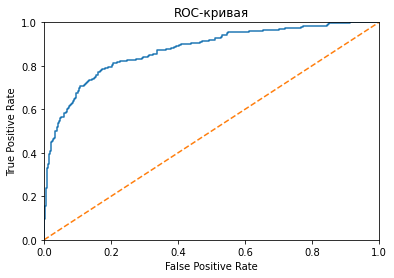

In [46]:
#строим ROC-кривую,чтобы оценить, насколько обученная модель отличается от случайной

#перебираем fpr, tpr с разными порогами классификации 
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

#строим график для fpr, tpr
plt.figure()
plt.plot(fpr, tpr)

#строим ROC-кривую случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

#устанавливаем границы осей от 0 до 1
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#подписываем оси 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#добавляем заголовок
plt.title("ROC-кривая")
#выводим готовый график
plt.show()

In [47]:
#считаем точность и полноту
print('Точность:', precision_score(target_test, test_predicted))
print('Полнота:', recall_score(target_test, test_predicted))

Точность: 0.6326530612244898
Полнота: 0.7072243346007605


### 6.1  Тестирование лучшей модели

  - Протестировали лучшую модель (**"Случайный лес"**), вычислили **F1-меру (0.6678635547576302)**, **'AUC-ROC'(0.8725253389115536)**, **'Accuracy'(0.852)**, построили **'ROC-кривую'** и посчитали **'Точность'(0.6326530612244898)** и **'Полноту'(0.7072243346007605)**. Выросли и 'Точность' и 'Полнота'.

## 7. Общий вывод

 -  В процессе работы над проектом мы: 
   
   - ознакомились с данными;
   - провели подготовку данных;
   - разбили данные на выборки;
   - исследовали баланс классов;
   - исследовали модели с учетом баланса классов; 
   - проверили предсказания моделей на тестовой выборке.
   
 - **Лучшие** показатели **F1-меры(0.6678635547576302)** и **'AUC-ROC'(0.8725253389115536)** получились у модели **"Случайный лес"** с количеством **деревьев: 70**, максимальной **глубиной: 9**, **критерием: "entropy"**,  **random_state: 12345** и взвешиванием классов. Удалось избежать переобучения всех моделей.

 ## 8. Дополнение-развитие

In [48]:
#задаем параметры оценки качества моделей
def print_metrics(true, predicted):
    print('Доля правильных ответов:', accuracy_score(true, predicted))
    print('Точность:', precision_score(true, predicted))
    print('Полнота:', recall_score(true, predicted))
    print('F1-мера:', f1_score(true, predicted))
    print('ROC-AUC:', roc_auc_score(true, predicted))
    print('Матрица ошибок:', confusion_matrix(true, predicted))
    
#print_metrics(target_valid, predicted_valid)
#print_metrics(target_test, test_predicted)

### Cсылка на проект в GitHub
https://github.com/DrSartoriuss/sup_learn